In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import ODESolver
sympy.init_printing()

In [2]:
# save plots in both png (raster graphics) and pdf (vector graphics)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# render plots with double dpi (for nice viewing on high DPI displays)
%config InlineBackend.figure_format = 'retina'

Vi skal studere den ordinære differensialligningen

\begin{equation}
u'(t) = -a u(t)
\end{equation}

med den kjente analytiske løsningen

\begin{equation}
u(t) = e^{-at}
\end{equation}

## Analytisk

Vi lager et symbolsk uttrykk for den analytiske løsningen til $u$ med sympy

In [3]:
a, t = sympy.symbols('a t')

In [4]:
u = sympy.exp(-a*t)
u

Vi kan verifisere at dette er en gyldig løsning ved først å få sympy til å beregne $u'(t)$

In [5]:
du = u.diff(t)
du

(sympy også kan integrere)

In [6]:
du.integrate(t)

Så må vi sjekke at $\frac{u'}{u} = -a$

In [7]:
factor = du/u
factor

For å plotte den analytiske funksjonen, konverterer vi den til en funksjon som kan evalueres med numpy arrays

In [8]:
u_func = sympy.lambdify((a, t), u, 'numpy')

Før vi kan plotte funksjonen, må vi bestemme en verdi for $a$. Her setter vi $a = 2$

In [9]:
a_value = 2
n = 20
x = np.linspace(0, 1, n)
y = u_func(a_value, x)
y

array([ 1.        ,  0.90008763,  0.81015773,  0.72921295,  0.65635556,
        0.59077751,  0.53175153,  0.47862297,  0.43080262,  0.3877601 ,
        0.34901807,  0.31414685,  0.28275969,  0.2545085 ,  0.22907995,
        0.20619203,  0.18559089,  0.16704807,  0.1503579 ,  0.13533528])

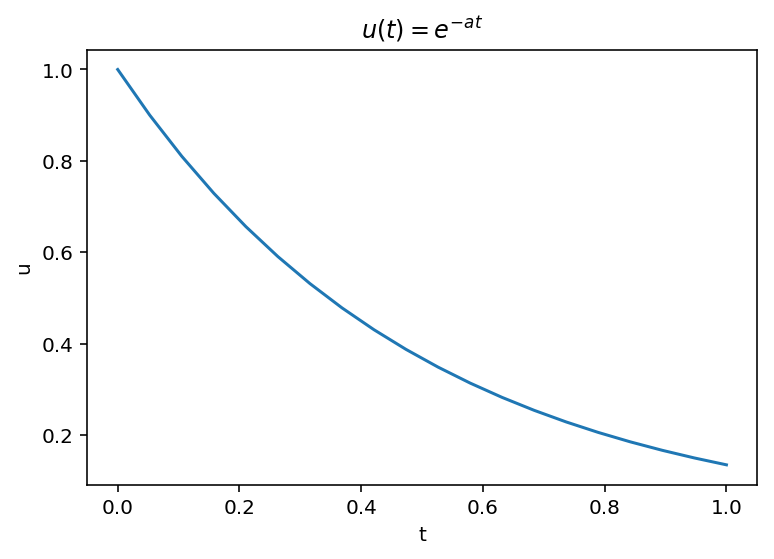

In [10]:
plt.plot(x, y)
plt.title('$u(t) = %s $' % sympy.latex(u))
plt.xlabel('t')
plt.ylabel('u')
plt.savefig('plot_exact.pdf')
plt.show()

## Numerisk

In [11]:
class Decay:
    def __init__(self, a):
        self.a = a
        
    def __call__(self, u, t):
        return -self.a*u

In [12]:
u0 = u.subs(a, a_value).subs(t, 0)
u0

In [13]:
f = Decay(2)
solver = ODESolver.ForwardEuler(f)
solver.set_initial_condition(u0)
u_FE, t_FE = solver.solve(x)

solver = ODESolver.RungeKutta4(f)
solver.set_initial_condition(u0)
u_RK4, t_RK4 = solver.solve(x)

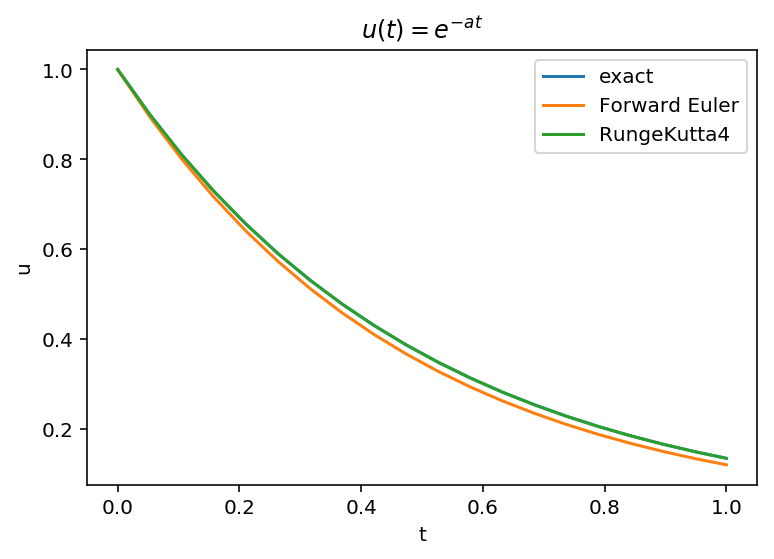

In [14]:
plt.plot(x, y, label='exact')
plt.plot(t_FE, u_FE, label='Forward Euler')
plt.plot(t_RK4, u_RK4, label='RungeKutta4')
plt.title('$u(t) = %s $' % sympy.latex(u)) # 
plt.xlabel('t')
plt.ylabel('u')
plt.legend(loc='best')
plt.show()